# Traffic Light Classification

## Preparation

### Mounting Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

### Downloading dataset and extracting

In [2]:
# %cp /gdrive/My\ Drive/Datasets/alex* /content/
# !7z x -oudacity alex-lechner-udacity-traffic-light-dataset.zip
# %rm alex-lechner-udacity-traffic-light-dataset.zip

## Classifying Traffic Light using CNN

### Importing libraries

In [3]:
import os
import sys
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import tensorflow.keras as keras
from imutils import paths
from lxml import etree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential, load_model

%matplotlib inline

### Preprocessing dataset

#### Conversion function definition

In [4]:
def png_to_jpeg(png_file, jpeg_file):
    """
    Convert PNG images to JPEG format
    :param png_file: full path of .png file
    :param jpeg_file: full path of .jpeg file
    """
    im = PIL.Image.open(png_file)
    rgb_im = im.convert('RGB')
    rgb_im.save(jpeg_file, 'JPEG')
    
def convert_images(folder):
    jpeg_dir = folder + '/jpeg'

    if not os.path.exists(jpeg_dir):
        os.makedirs(jpeg_dir)
    image_paths = list(paths.list_images(folder))

    for image_path in image_paths:
        # if image_path.split('.')[-1].lower() == 'png':
        jpeg_image_path = image_path.replace(
            os.path.dirname(image_path),
            jpeg_dir
        )
        jpeg_image_path = jpeg_image_path.replace('.png', '.jpg')
        # convert images to jpeg if they don't already exist
        if not os.path.isfile(jpeg_image_path):
            png_to_jpeg(image_path, jpeg_image_path)

#### Converting images

In [5]:
folder = 'data/udacity/simulator_dataset_rgb/Unknown'
convert_images(folder)

#### Loading images and labels

In [6]:
num_classes = 4
WIDTH = 100
HEIGHT = 100
light_colors = ['Green', 'Red', 'Yellow', 'Unknown']

image_folders = 'data/udacity/simulator_dataset_rgb/{}/jpeg/'

data = []
labels = []

for color in light_colors:
    imagePaths = list(paths.list_images(image_folders.format(color)))

    for imagePath in imagePaths:
        image = cv2.imread(imagePath, -1)
        image = cv2.resize(image, (HEIGHT, WIDTH))
        image = np.reshape(image, (HEIGHT, WIDTH, 3))

        data.append(image)
        labels.append(color)

data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

### Split test-train

In [7]:
(train_images, test_images, train_labels, test_labels) = train_test_split(data, labels, test_size=0.2)

### Reformat labels

In [ ]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

### Creating the model

In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 19, 19, 64)       

### Compiling the model and training

In [33]:
time_start = time.time()
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    verbose=2
)
time_end = time.time()
print('Training time:', time_end - time_start)

Epoch 1/10
33/33 - 20s - loss: 0.0570 - accuracy: 0.9771 - val_loss: 0.3074 - val_accuracy: 0.9389
Epoch 2/10
33/33 - 21s - loss: 0.0365 - accuracy: 0.9838 - val_loss: 0.4047 - val_accuracy: 0.9237
Epoch 3/10
33/33 - 21s - loss: 0.0453 - accuracy: 0.9819 - val_loss: 0.4077 - val_accuracy: 0.9351
Epoch 4/10
33/33 - 20s - loss: 0.0420 - accuracy: 0.9828 - val_loss: 0.3633 - val_accuracy: 0.9389
Epoch 5/10
33/33 - 21s - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.4345 - val_accuracy: 0.9389
Epoch 6/10
33/33 - 22s - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.3766 - val_accuracy: 0.9504
Epoch 7/10
33/33 - 21s - loss: 0.0208 - accuracy: 0.9904 - val_loss: 0.4639 - val_accuracy: 0.9427
Epoch 8/10
33/33 - 22s - loss: 0.0376 - accuracy: 0.9838 - val_loss: 0.4730 - val_accuracy: 0.9504
Epoch 9/10
33/33 - 21s - loss: 0.0408 - accuracy: 0.9857 - val_loss: 0.4560 - val_accuracy: 0.9466
Epoch 10/10
33/33 - 21s - loss: 0.0244 - accuracy: 0.9876 - val_loss: 0.5254 - val_accuracy: 0.9351
Training 

### Evaluating the model

9/9 - 1s - loss: 0.5254 - accuracy: 0.9351


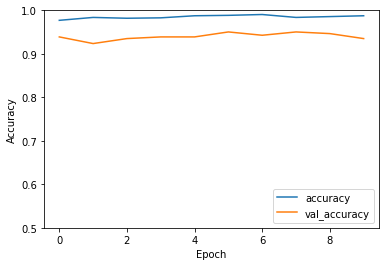

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [35]:
print(test_acc, test_loss)

0.9351145029067993 0.5254457592964172


### Saving trained model

In [36]:
!rm -rf saved_model/trained_cnn/
model.save('saved_model/trained_cnn')

INFO:tensorflow:Assets written to: saved_model/trained_cnn/assets
